In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
list = [1, 2, 3]
# np.random.choice?

df = pd.read_excel('data/demo_quant.xlsx')
# Drop the empty slots 25 > to 22
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df.tail()


,Low,Medium,High
18,1.279188e+06,1.421320e+06,1.634518e+06
19,8.367014e+05,9.296683e+05,1.069119e+06
20,1.571953e+06,1.746614e+06,2.008606e+06
21,4.759524e+05,5.288360e+05,6.081614e+05
22,9.757024e+04,1.084114e+05,1.246731e+05


In [4]:
# Randomly pick the column name
for i in range(len(df.columns)):
    print(i)

df.iloc[0, 1]
df.shape[0]

0
1
2


23

# Running the simulation only on Low, Medium, High outputs

In [5]:
total_sims = np.zeros(10000)
for i in range(10000):
    sim_cost = np.zeros(df.shape[0])
    for index, row in df.iterrows():
        rc = df.iloc[index, np.random.choice(range(len(df.columns)))]
        sim_cost[index] = rc
    total_sims[i] = sim_cost.sum()


(array([   3.,   13.,   79.,  152.,  361.,  576.,  809., 1037., 1146.,
        1218., 1157., 1094.,  842.,  669.,  425.,  234.,  119.,   47.,
          13.,    6.]),
 array([19871354.52387589, 20106798.91018134, 20342243.29648678,
        20577687.68279222, 20813132.06909766, 21048576.4554031 ,
        21284020.84170855, 21519465.22801399, 21754909.61431943,
        21990354.00062487, 22225798.38693032, 22461242.77323576,
        22696687.1595412 , 22932131.54584664, 23167575.93215209,
        23403020.31845753, 23638464.70476297, 23873909.09106841,
        24109353.47737386, 24344797.8636793 , 24580242.24998474]),
 <a list of 20 Patch objects>)

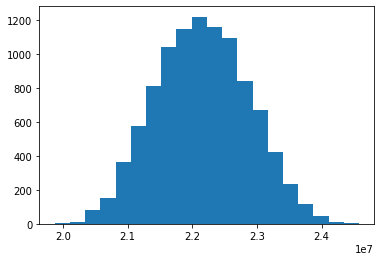

In [6]:
total_sims = pd.Series(total_sims)
plt.hist(total_sims, bins=20)

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    #x-data for the ECDF : x
    x = np.sort(data)
    #y-data for ecdf : y
    y = np.arange(1, n+1) / n
    return x, y

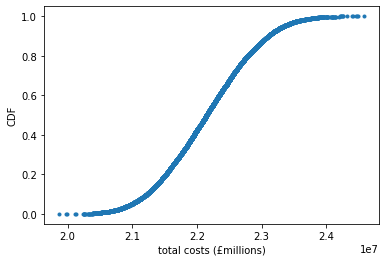

In [8]:
ts_x, ts_y = ecdf(total_sims)
plt.plot(ts_x, ts_y, marker='.', linestyle='none')
plt.xlabel('total costs (£millions)')
plt.ylabel('CDF')
plt.show()

# Skew + kurtosis

In [19]:
skew(total_sims)

0.1361687855675262

In [24]:
# You need to add 3 to get kurtosis, scipy.stats is using excess kurtosis
kurtosis(total_sims) + 3

2.8060093268023434

# Running model against Low, Medium, High costs, including Estimated uncertainty

The model summary given appears to work with both low, medium (most likely) and high costs, but it also seems to include estimated uncertainty as a separate one.

In [9]:
df1 = pd.read_excel('data/demo_quant_eu.xlsx')
# Drop the empty slots 25 - 22
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1.drop(['index'], axis=1, inplace=True)

In [10]:
total_sims = np.zeros(10000)
for i in range(10000):
    sim_cost = np.zeros(df1.shape[0])
    for index, row in df.iterrows():
        eu = df1.iloc[index, np.random.choice(range(0, 2))]
        rc = df1.iloc[index, np.random.choice(range(2, 5))]
        sim_cost[index] = rc + (eu * rc)
    total_sims[i] = sim_cost.sum()


In [11]:
# Verify 
# df1.iloc[0, 1] * df1.iloc[0, 4] + df1.iloc[0, 4]
# df1.iloc[0, 0] * df1.iloc[0, 4] + df1.iloc[0, 4]

(array([  21.,   54.,  127.,  255.,  478.,  711.,  949., 1193., 1253.,
        1188., 1077.,  920.,  675.,  474.,  292.,  190.,   84.,   39.,
          13.,    7.]),
 array([19323775.37991026, 19696260.62163201, 20068745.86335376,
        20441231.10507551, 20813716.34679726, 21186201.58851901,
        21558686.83024076, 21931172.07196251, 22303657.31368426,
        22676142.55540601, 23048627.79712776, 23421113.03884951,
        23793598.28057126, 24166083.52229301, 24538568.76401476,
        24911054.00573651, 25283539.24745826, 25656024.48918001,
        26028509.73090176, 26400994.97262351, 26773480.21434526]),
 <a list of 20 Patch objects>)

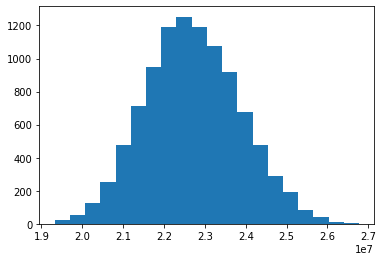

In [12]:
total_sims = pd.Series(total_sims)
plt.hist(total_sims, bins=20)


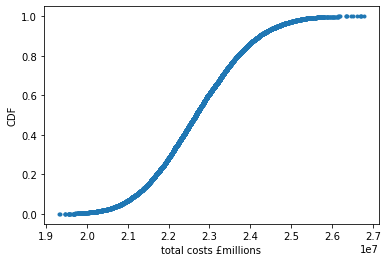

In [13]:
ts_x, ts_y = ecdf(total_sims)
plt.plot(ts_x, ts_y, marker='.', linestyle='none')
plt.xlabel('total costs £millions')
plt.ylabel('CDF')
plt.show()

In [14]:
total_sims.mean()

22703929.512301102

In [15]:
total_sims.median()

22667089.646772142

In [16]:
total_sims.max()

26773480.214345258

# Skew + kurtosis

In [18]:
skew(total_sims)

0.1361687855675262

In [23]:
# You need to add 3 to get kurtosis, scipy.stats is using excess kurtosis
kurtosis(total_sims) + 3

2.8060093268023434